<a href="https://colab.research.google.com/github/satyam-jha-16/Anuran-dataset-ML/blob/main/ExamQues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
df=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Select the numeric columns for scaling (can be modified)
numeric_cols = df.select_dtypes(include=['number'])

# Fit the scaler on the data
scaler.fit(numeric_cols)

# Scale the data and assign it back to the DataFrame
df_scaled = df.copy()
df_scaled[numeric_cols.columns] = scaler.transform(numeric_cols)
df_scaled.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,0.333333,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.666667,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,0.333333,0.0
3,0.408163,0.0,1.000000,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.666667,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,0.333333,0.0


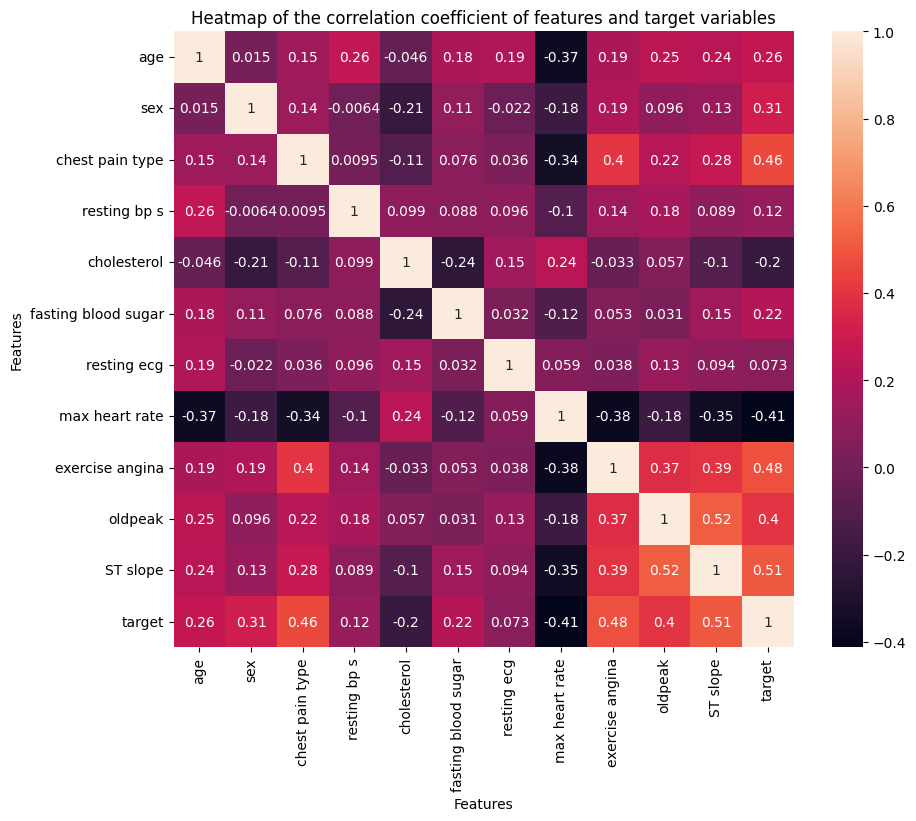

In [23]:
#created heatmap between target and feature variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Heatmap of the correlation coefficient of features and target variables')
plt.show()

In [24]:
y = df_scaled ['target']
X = df_scaled.drop('target',axis =1)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=5)

rfe.fit(X, y)

support = rfe.support_

selected_features = X.columns[support]

print("Selected Features:", selected_features)

df_sf = df_scaled[selected_features]
X_sf = df_sf
y_sf = y

Selected Features: Index(['sex', 'chest pain type', 'max heart rate', 'oldpeak', 'ST slope'], dtype='object')


In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# a dictionary for keeping all scores of the classifiers
trainScores={}

In [27]:
from sklearn.svm import SVC

# Train on the feature obtained from forward selection method

X_train, X_test, y_train, y_test = train_test_split(X_sf, y_sf, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the F1-score and accuracy and append to the trainScore library
trainScores['SVM-f1 score']= f1_score(y_test, y_pred)
trainScores['SVM-accuracy']= accuracy_score(y_test, y_pred)
trainScores

{'SVM-f1 score': 0.875, 'SVM-accuracy': 0.8571428571428571}